In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from time import process_time

In [0]:
Test_data = pd.read_csv('/content/drive/My Drive/Deep Learning Course Spring 99/DataSets/Fashion-MNIST/testData.csv', header = None)
Test_label = pd.read_csv('/content/drive/My Drive/Deep Learning Course Spring 99/DataSets/Fashion-MNIST/testLabels.csv', header = None)
Train_data = pd.read_csv('/content/drive/My Drive/Deep Learning Course Spring 99/DataSets/Fashion-MNIST/trainData.csv', header = None)
Train_label = pd.read_csv('/content/drive/My Drive/Deep Learning Course Spring 99/DataSets/Fashion-MNIST/trainLabels.csv', header = None)

In [0]:
Test_data = Test_data.to_numpy()
Test_label = Test_label.to_numpy()
Train_data = Train_data.to_numpy()
Train_label = Train_label.to_numpy()

In [0]:
maxD = np.max(Train_data, axis=0)
minD = np.min(Train_data, axis=0)
delta = maxD - minD
Train_data = Train_data - minD
Test_data = Test_data - minD
Train_data = 2 * (Train_data/delta) - 1
Test_data = 2 * (Test_data/delta) - 1

In [0]:
def relu(x):
  return np.maximum(x, np.zeros_like(x))

def Cal_accuracy(True_label, Estimated_label):
  return np.count_nonzero(np.transpose(True_label)==np.array(Estimated_label))/True_label.size

def step(x):
  return 1*(x > np.zeros_like(x))

def encode(vect, idx):
  temp = step(vect)
  temp[idx] = 0
  n = np.sum(temp)
  for i in range(len(temp)):
    if temp[i] == 1:
      temp[i] = -1
  temp[idx] = n
  return temp

In [0]:
class Network:
  def __init__(self, input_node, hidden_layer, hidden_node, output_node):
    self.number_input_node = input_node
    self.number_hidden_layer = hidden_layer
    self.number_hidden_node = hidden_node
    self.number_class_output = output_node
    self.weight = {}
    self.layer = {}
    self.batch_data = {}
    self.batch_label = {}
    self.diff_weight = {}
    self.score = []
    self.result = []
    self.init_weight()
    self.loss = []
    self.back_prob_output = []
    for i in range(self.number_hidden_layer + 1):
      self.diff_weight["w" + str(i) + "_prev"] = 0
      self.diff_weight["b" + str(i) + "_prev"] = 0
    self.momentum = 0.9
    self.learning_rate = 0.001
    self.number_turn = 100
    self.batchS = 128
    self.accuracy_graph = []
    self.loss_graph = []
    self.accuracy_graph_epoch = []

  def set_turn(self, x):
    self.number_turn = x

  def set_learning_rate(self, x):
    self.learning_rate = x

  def set_batch_size(self, x):
    self.batchS = x
  
  def load_weights(self):
    for i in range(self.number_hidden_layer + 1):
      self.weight["w" + str(i)] = (pd.read_csv("/content/drive/My Drive/Deep Learning Course Spring 99/DataSets/Fashion-MNIST/w" + str(i) + ".csv", header=None)).to_numpy()
      self.weight["b" + str(i)] = (pd.read_csv("/content/drive/My Drive/Deep Learning Course Spring 99/DataSets/Fashion-MNIST/b" + str(i) + ".csv", header=None)).to_numpy()

  def init_weight(self):
    self.weight["w0"] = np.random.normal(loc=0, scale=0.14, size=(self.number_hidden_node[0], self.number_input_node))
    self.weight["b0"] = np.random.normal(loc=0, scale=0.14, size=(self.number_hidden_node[0], 1))
    for i in range(self.number_hidden_layer - 1):
      self.weight["w" + str(i+1)] = (np.random.normal(loc=0, scale=0.14, size=(self.number_hidden_node[i+1], self.number_hidden_node[i])))
      self.weight["b" + str(i+1)] = (np.random.normal(loc=0, scale=0.14, size=(self.number_hidden_node[i+1], 1)))
    self.weight["w" + str(self.number_hidden_layer)] = np.random.normal(loc=0, scale=0.14, size=(self.number_class_output, self.number_hidden_node[self.number_hidden_layer-1]))
    self.weight["b" + str(self.number_hidden_layer)] = np.random.normal(loc=0, scale=0.14, size=(self.number_class_output, 1))
    
  def forward(self, data):
    self.layer.clear()
    self.layer["input"] = data
    if len(data) == data.size:
      self.layer["z0"] = (np.matmul(self.weight["w0"],np.transpose(data))).reshape((len(MyNetwork.weight["w0"]),1))
    else:
      self.layer["z0"] = (np.matmul(self.weight["w0"], np.transpose(data)))
    self.layer["z0"] = np.add(self.layer["z0"], self.weight["b0"])
    self.layer["r0"] = relu(self.layer["z0"])
    self.layer["s0"] = step(self.layer["z0"])
    for i in range(self.number_hidden_layer - 1):
      self.layer["z" + str(i + 1)] = np.matmul(self.weight["w" + str(i + 1)], self.layer["r" + str(i)])
      self.layer["z" + str(i + 1)] = np.add(self.layer["z" + str(i + 1)], self.weight["b" + str(i + 1)])
      self.layer["r" + str(i + 1)] = relu(self.layer["z" + str(i + 1)])
      self.layer["s" + str(i + 1)] = step(self.layer["z" + str(i + 1)])
    self.layer["z" + str(self.number_hidden_layer)] = np.matmul(self.weight["w" + str(self.number_hidden_layer)], self.layer["r" + str(self.number_hidden_layer - 1)])
    self.layer["z" + str(self.number_hidden_layer)] = np.add(self.layer["z" + str(self.number_hidden_layer)], self.weight["b" + str(self.number_hidden_layer)])
    self.layer["r" + str(self.number_hidden_layer)] = relu(self.layer["z" + str(self.number_hidden_layer)])
    self.layer["s" + str(self.number_hidden_layer)] = step(self.layer["z" + str(self.number_hidden_layer)])
    self.score = self.layer["r" + str(self.number_hidden_layer)]
    temp = self.decide(self.score)
    return temp
  
  def decide(self, data):
    self.result = np.argmax(data, axis=0)
    return self.result

  def cal_loss(self, label):
    self.loss.clear()
    self.back_prob_output = []
    temp = np.transpose(self.score)
    for i in range(len(label)):
      self.loss.append(np.sum(relu(temp[i] - temp[i][label[i]] + 1))-1)# inja ro bayad taghir bedi
      self.back_prob_output.append(encode((temp[i] - temp[i][label[i]] + 1), label[i]))
    self.back_prob_output = (np.transpose(self.back_prob_output))/len(label)
    total_loss = np.sum(self.loss)/len(self.loss)
    self.loss_graph.append(total_loss)
    return total_loss

  def batching(self, data, label):
    batch_size = self.batchS
    if len(data) == data.size:
      batch[0] = data
      return
    for i in range(int(len(data)/batch_size)):
      self.batch_data[i] = data[i*batch_size:(i+1)*batch_size]
      self.batch_label[i] = label[i*batch_size:(i+1)*batch_size]
    if len(data)%batch_size != 0:
      self.batch_data[int(len(data)/batch_size)] = data[int(len(data)/batch_size)*batch_size:len(data)]
      self.batch_label[int(len(data)/batch_size)] = label[int(len(data)/batch_size)*batch_size:len(data)]

  def back_prob(self):
    temp = np.multiply(self.back_prob_output, self.layer["s" + str(self.number_hidden_layer)])
    for i in range(self.number_hidden_layer):
      self.diff_weight["w" + str(self.number_hidden_layer - i)] = np.matmul(temp, np.transpose(self.layer["r"+ str(self.number_hidden_layer-1-i)]))
      self.diff_weight["b" + str(self.number_hidden_layer - i)] = np.matmul(temp, np.ones((len(temp[0]), 1)))
      temp = np.matmul(np.transpose(self.weight["w" + str(self.number_hidden_layer - i)]), temp)
      temp = np.multiply(self.layer["s" + str(self.number_hidden_layer - i - 1)], temp)
    self.diff_weight["w0"] = np.matmul(temp, self.layer["input"])
    self.diff_weight["b0"] = np.matmul(temp, np.ones((len(temp[0]), 1)))

    for i in range(self.number_hidden_layer + 1):
      self.diff_weight["w" + str(i) + "_prev"] = ((1 - self.momentum) * self.diff_weight["w" + str(i)] + self.momentum * self.diff_weight["w" + str(i) + "_prev"])
      self.diff_weight["b" + str(i) + "_prev"] = ((1 - self.momentum) * self.diff_weight["b" + str(i)] + self.momentum * self.diff_weight["b" + str(i) + "_prev"])

    for i in range(self.number_hidden_layer + 1):
      self.weight["w" + str(i)] = self.weight["w" + str(i)] + self.diff_weight["w" + str(i) + "_prev"] * self.learning_rate
      self.weight["b" + str(i)] = self.weight["b" + str(i)] + self.diff_weight["b" + str(i) + "_prev"] * self.learning_rate

  def Train_Network(self, data, label):
    epoch = 0
    self.accuracy_graph_epoch.append((self.Test_Network(data, label)))
    for j in range(self.number_turn):
      self.batching(data, label)
      for i in range(len(self.batch_data)):
        self.forward(self.batch_data[i])
        self.accuracy_graph.append(Cal_accuracy(self.batch_label[i], self.forward(self.batch_data[i])))
        print(self.cal_loss(self.batch_label[i]), " step ", i," of the epoch ", j , "the steps is: ", epoch)
        self.back_prob()
        epoch += 1
      self.accuracy_graph_epoch.append((self.Test_Network(data, label)))

  def Test_Network(self, data, label):
    if(len(data) == data.size):
      temp = self.batchS
      self.batchS = 1
      print(Cal_accuracy(label, MyNetwork.forward(data)))
      self.batchS = temp
    else:
      print(Cal_accuracy(label, MyNetwork.forward(data)))
    return (Cal_accuracy(label, MyNetwork.forward(data)))

      
    


In [9]:
MyNetwork = Network(784,1,[150],10)
MyNetwork.set_learning_rate(0.05)
MyNetwork.set_turn(20)
MyNetwork.set_batch_size(128)
start = process_time()
MyNetwork.Train_Network(Train_data, Train_label)
print('time of train :', process_time()-start)

Streaming output truncated to the last 5000 lines.
0.9954179468519659  step  172  of the epoch  9 the steps is:  4393
1.692472918547673  step  173  of the epoch  9 the steps is:  4394
0.9373802644631143  step  174  of the epoch  9 the steps is:  4395
1.335553191217174  step  175  of the epoch  9 the steps is:  4396
1.7999270388212247  step  176  of the epoch  9 the steps is:  4397
1.3215718744806988  step  177  of the epoch  9 the steps is:  4398
1.9482210915407872  step  178  of the epoch  9 the steps is:  4399
1.33972475028295  step  179  of the epoch  9 the steps is:  4400
1.4722163327998765  step  180  of the epoch  9 the steps is:  4401
1.0086631221966451  step  181  of the epoch  9 the steps is:  4402
1.0441930520132785  step  182  of the epoch  9 the steps is:  4403
1.212505113091189  step  183  of the epoch  9 the steps is:  4404
1.4426998497502326  step  184  of the epoch  9 the steps is:  4405
1.2285706127253895  step  185  of the epoch  9 the steps is:  4406
1.25671888307431

In [10]:
MyNetwork.Test_Network(Test_data, Test_label)
MyNetwork.Test_Network(Train_data, Train_label)

0.7825
0.81545


0.81545

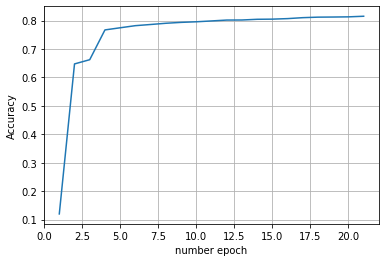

In [11]:
plt.plot(np.arange(1,len(MyNetwork.accuracy_graph_epoch)+1), MyNetwork.accuracy_graph_epoch)
plt.ylabel('Accuracy')
plt.xlabel("number epoch")
plt.grid(True)
plt.show()

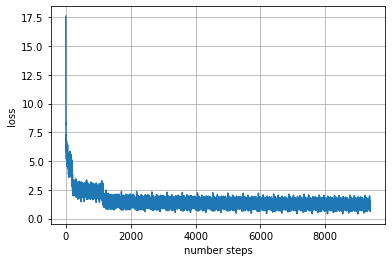

In [12]:
plt.plot(np.arange(1,len(MyNetwork.loss_graph)+1), MyNetwork.loss_graph)
plt.ylabel('loss')
plt.xlabel("number steps")
plt.grid(True)
plt.show()

In [0]:
for i in range(MyNetwork.number_hidden_layer + 1):
  pd.DataFrame(MyNetwork.weight["w" + str(i)]).to_csv("/content/drive/My Drive/Deep Learning Course Spring 99/DataSets/Fashion-MNIST/w" + str(i) + ".csv", index=False, header=False)
  pd.DataFrame(MyNetwork.weight["b" + str(i)]).to_csv("/content/drive/My Drive/Deep Learning Course Spring 99/DataSets/Fashion-MNIST/b" + str(i) + ".csv", index=False, header=False)
  pd.DataFrame(MyNetwork.accuracy_graph).to_csv("/content/drive/My Drive/Deep Learning Course Spring 99/DataSets/Fashion-MNIST/accuracy.csv", index=False, header=False)
  pd.DataFrame(MyNetwork.loss_graph).to_csv("/content/drive/My Drive/Deep Learning Course Spring 99/DataSets/Fashion-MNIST/loss.csv", index=False, header=False)


In [0]:
MyNetwork.Test_Network(Test_data, Test_label)

0.1341
